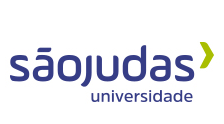

# Inteligência Artificial
- **Professor:** Sergio Bonato <antonio.bonato@saojudas.br>

## Aprendizado de Máquina Supervisionado - Classificação
## Análise Preditiva do Conjunto de Dados do Titanic 

In [1]:
#!pip install pydataset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pydataset
from random import seed
# fixar a semente para que os resultados sejam repetíveis
seed(42)

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Carga e Análise dos Dados

In [3]:
titanic = pydataset.data('titanic')

In [4]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [5]:
titanic.columns

Index(['class', 'age', 'sex', 'survived'], dtype='object')

In [6]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     1316 non-null   object
 1   age       1316 non-null   object
 2   sex       1316 non-null   object
 3   survived  1316 non-null   object
dtypes: object(4)
memory usage: 51.4+ KB


In [8]:
titanic['class'] = titanic['class'].astype('category')
titanic['age'] = titanic['age'].astype('category')
titanic['sex'] = titanic['sex'].astype('category')
titanic['survived'] = titanic['survived'].astype('category')

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   class     1316 non-null   category
 1   age       1316 non-null   category
 2   sex       1316 non-null   category
 3   survived  1316 non-null   category
dtypes: category(4)
memory usage: 15.8 KB


### Balanceamento das classes

O conjunto de dados está desbalanceado, havendo predominância da etiqueta 'no' que significa não sobreviveu.

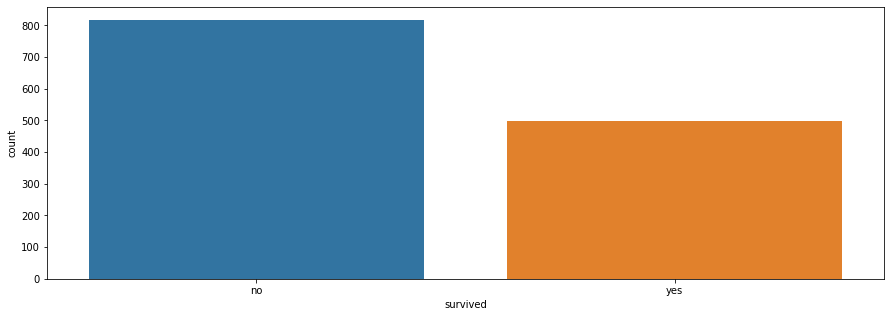

In [10]:
f, ax = plt.subplots(figsize=(15, 5))
ax1 = sns.countplot(x="survived",
                linewidth=0,
                data=titanic, ax=ax)

### Sobrevivência por Classe

Verifica-se que, em número absolutos, houve mais mortos na 3a classe. Apenas na 1a classe houve mais sobreviventes do que mortos.

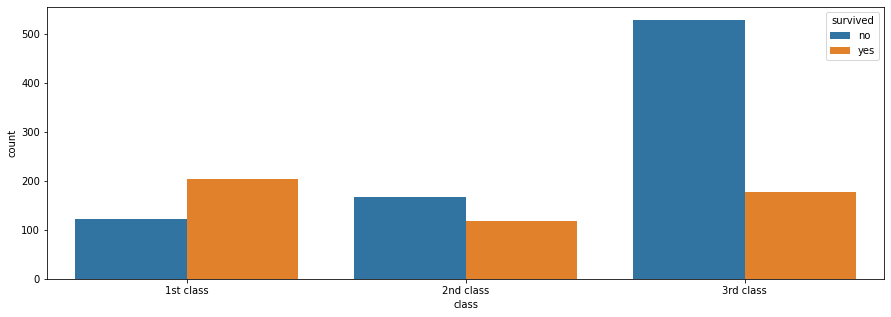

In [11]:
f, ax = plt.subplots(figsize=(15, 5))
ax1 = sns.countplot(x="class",
                hue="survived",
                linewidth=0,
                data=titanic, ax=ax)

### Sobrevivência por Idade
Nota-se que o número de mortes superou largamente o número de sobreviventes entre adultos, enquanto entre crianças o número de mortos e sobreviventes foi praticamente o mesmo.

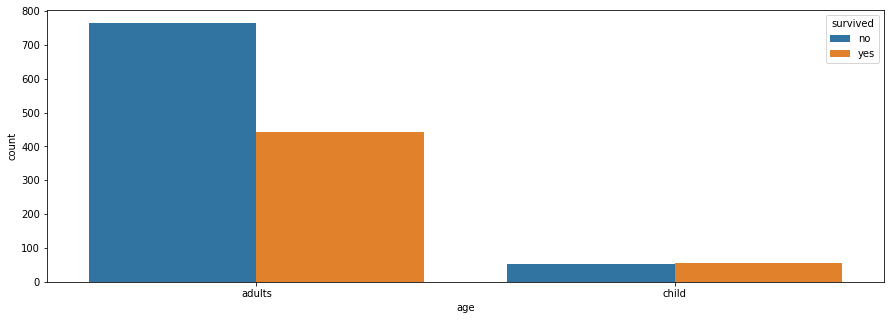

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
ax1 = sns.countplot(x="age",
                hue="survived",
                linewidth=0,
                data=titanic, ax=ax)

### Sobrevivência por Sexo

O número de mortes de indivíduos do sexo masculino foi mais do que o triplo do que o de sobreviventes. Contrariamente, mais do que o dobro de mulheres sobreviveu.

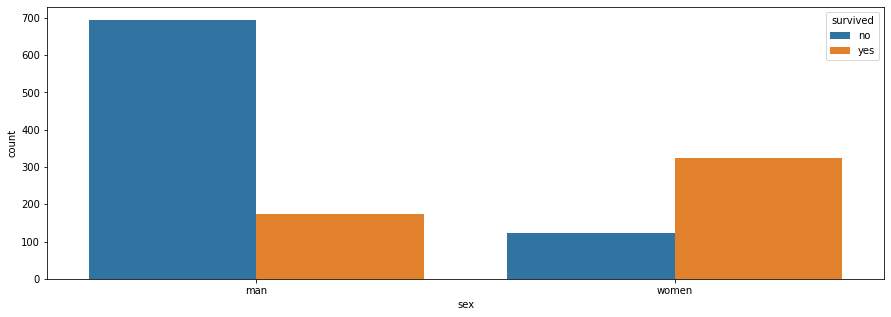

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
ax1 = sns.countplot(x="sex",
                hue="survived",
                linewidth=0,
                data=titanic, ax=ax)

### Sobrevivência por Sexo e Classe

Juntando-se duas características, sexo e classe, nota-se que o número de mortes masculinas, em números absolutos, foi muito maior na 3a classe. Assim como o número de mortes femininas superou largamente o número de mortes de mulheres na 1a e 2a classes.

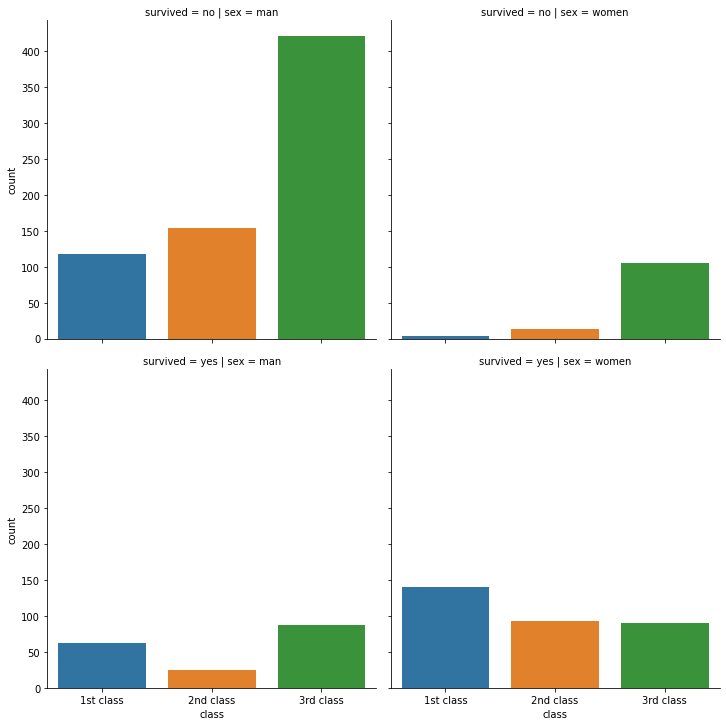

In [14]:
ax=sns.catplot(x='class', col='sex', row='survived', data=titanic,kind='count')

### Sobrevivência por Classe e Idade

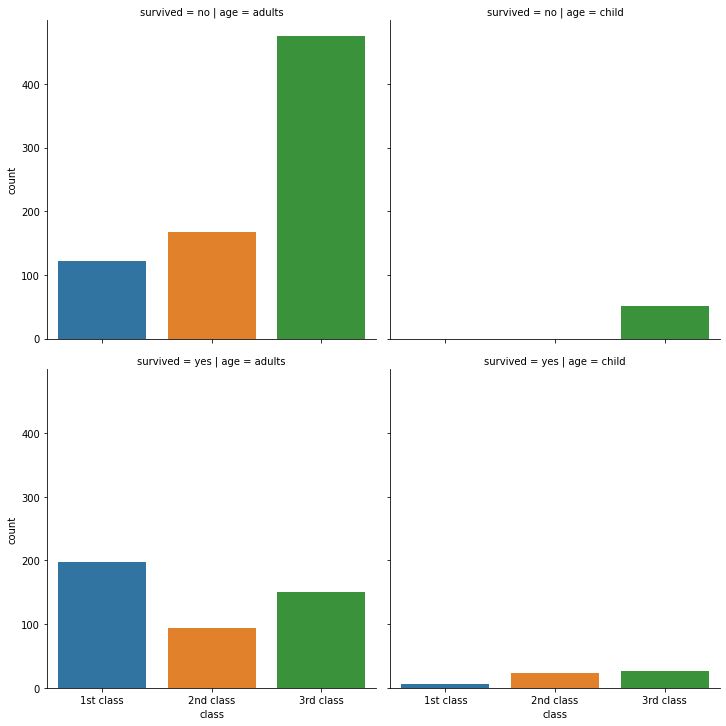

In [15]:
ax=sns.catplot(x='class', col='age', row='survived', data=titanic,kind='count')

### Sobrevivência por Sexo e Idade

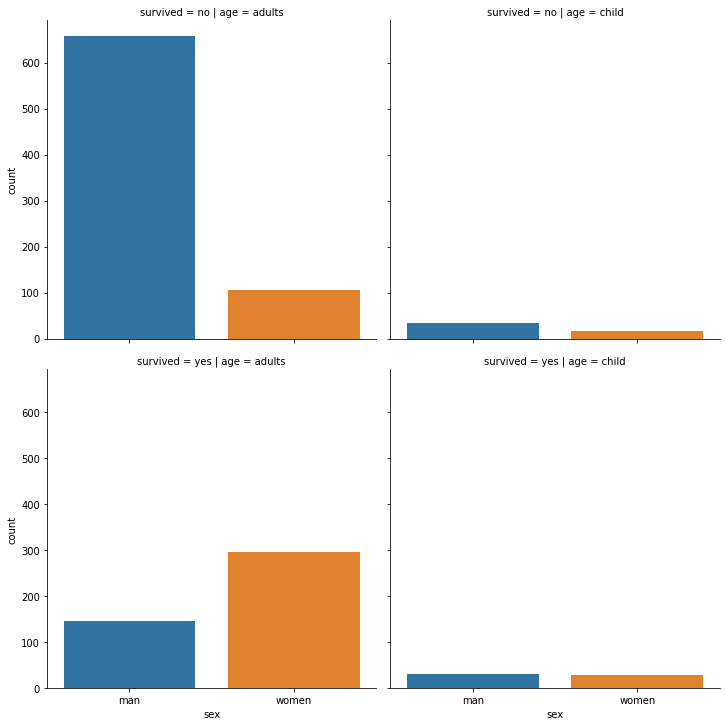

In [16]:
ax=sns.catplot(x='sex', col='age', row='survived', data=titanic,kind='count')

In [17]:
# imprime um gráfico com barras agrupadas
def grouped_box(g1, g2,label1, label2, grouped_labels, ylabel='', title='', rotation=0):

    x = np.arange(len(grouped_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x + width/2, g1, width, label=label1)
    rects2 = ax.bar(x - width/2, g2, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(grouped_labels)
    ax.legend()
    plt.xticks(rotation=rotation)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [18]:
titanic_grouped = titanic.groupby(['class','age','sex','survived'])['class'].count()
survival_rate = round(titanic_grouped/titanic_grouped.sum(level=['class','age','sex']),2)
print(survival_rate)

class      age     sex    survived
1st class  adults  man    no          0.67
                          yes         0.33
                   women  no          0.03
                          yes         0.97
           child   man    no          0.00
                          yes         1.00
                   women  no          0.00
                          yes         1.00
2nd class  adults  man    no          0.92
                          yes         0.08
                   women  no          0.14
                          yes         0.86
           child   man    no          0.00
                          yes         1.00
                   women  no          0.00
                          yes         1.00
3rd class  adults  man    no          0.84
                          yes         0.16
                   women  no          0.54
                          yes         0.46
           child   man    no          0.73
                          yes         0.27
                   

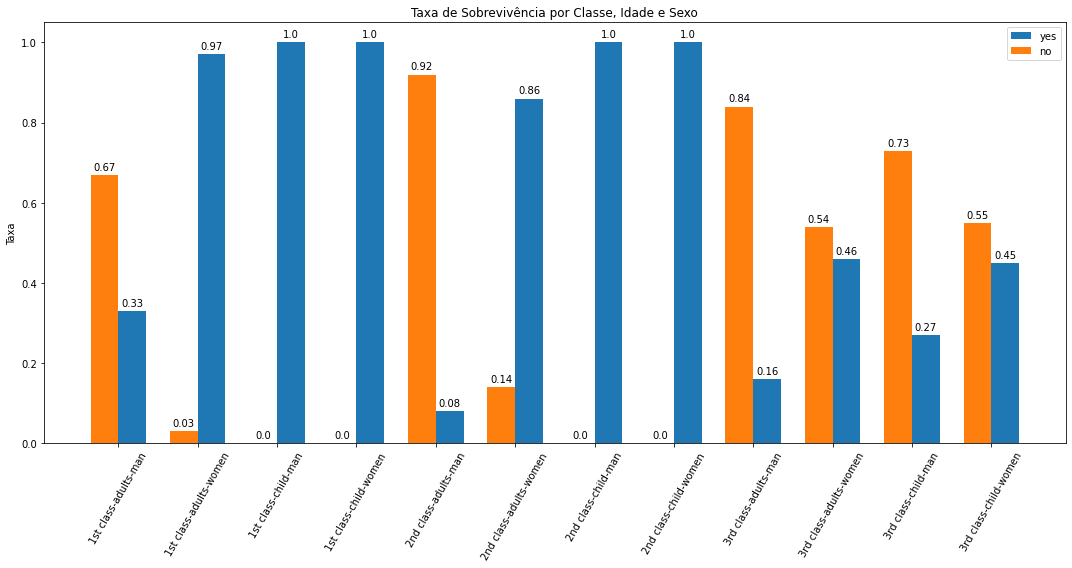

In [19]:
sr = survival_rate.unstack()
group_labels = ['-'.join(i) for i in sr.index]
survive_yes = sr['yes']
survive_no = sr['no']
grouped_box(g1=survive_yes, g2=survive_no, label1='yes', label2='no', \
            grouped_labels = group_labels, ylabel='Taxa', \
            title='Taxa de Sobrevivência por Classe, Idade e Sexo', rotation=60)

## Separação dos dados em treinamento, validação e teste
Usando 70-20-10 com proporcionalidade de classes.

In [20]:
# Separar a variavel alvo (target) do conjunto de dados e converter para numpy.array
Y = titanic['survived']
X = titanic.drop('survived', axis=1)
feature_names = X.columns
print(X.shape, Y.shape)

(1316, 3) (1316,)


In [21]:
# Separar aleatoriamente 70% para treino, 20% para validacao e 10% para teste
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,train_size=0.7,random_state=42,stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp,train_size=0.6,random_state=42,stratify=Y_temp)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(921, 3) (921,) (237, 3) (237,) (158, 3) (158,)


### Verificando a proporcionalidade das classes

In [22]:
print('Percentual da maior classe no dataset (%s): %0.2f' % (Y.describe().top, 100*Y.describe().freq/len(Y)))
print('Percentual da maior classe em treinamento (%s): %0.2f' % (Y_train.describe().top, 100*Y_train.describe().freq/len(Y_train)))
print('Percentual da maior classe em validação (%s): %0.2f' % (Y_val.describe().top, 100*Y_val.describe().freq/len(Y_val)))
print('Percentual da maior classe em teste (%s): %0.2f' % (Y_test.describe().top, 100*Y_test.describe().freq/len(Y_test)))

Percentual da maior classe no dataset (no): 62.08
Percentual da maior classe em treinamento (no): 62.11
Percentual da maior classe em validação (no): 62.03
Percentual da maior classe em teste (no): 62.03


In [23]:
# transformar em numpy.array
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_val = X_val.to_numpy()
y_val = Y_val.to_numpy()
x_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

## Tratamento dos dados
A normalização é desnecessária para árvores de decisão, mas os atributos categóricos precisam ser transformados de caractere em ordinais porque o Scikit ainda não aceita strings. Inclusive a feature alvo (Y).

In [24]:
# índice dos atributos categóricos
categ_atrib = [0,1,2]

encX = ColumnTransformer([('ordinal',OrdinalEncoder(), categ_atrib)], verbose=True)

print(encX)
x_train = encX.fit_transform(x_train)
x_val = encX.transform(x_val)
x_test = encX.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

labels = ['yes', 'no']
# reshape necessário para fazer o encoder
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

enc_y = OrdinalEncoder(categories = [labels])
print(enc_y)
y_train = enc_y.fit_transform(y_train)
y_val = enc_y.transform(y_val)
y_test = enc_y.transform(y_test)
# y volta para o shape original
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), [0, 1, 2])],
                  verbose=True)
[ColumnTransformer] ....... (1 of 1) Processing ordinal, total=   0.0s
(921, 3)
(237, 3)
(158, 3)
OrdinalEncoder(categories=[['yes', 'no']])
(921,)
(237,)
(158,)


#### Função de matriz de decisão para análise dos resultados

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

def heat_map_matriz(y_test, y_pred, labels):
    c = confusion_matrix(y_test, y_pred)
    r = c / c.sum(axis=1).reshape(-1, 1)

    print(classification_report(y_test, y_pred, target_names=labels, digits=4))
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print('balanced accuracy: %.4f' % round(bal_acc,4))

    sns.set_context("talk")
    plt.figure(figsize=(8, 4))
    plt.title('Matriz de Confusão - Heatmap')
    sns.heatmap(r, linewidths=.5, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, annot=True, fmt='.1%')
    plt.show()
    sns.set_context("notebook")
    return bal_acc

## Resultados

In [26]:
# para armazenar resultados e modelos
lista_modelos = ['Árvore de Decisão', 'AD Regularizada','Floresta Aleatória', 'Floresta Balanceada', 'Floresta SMOTE']

In [27]:
modelos = dict()
acc_train = dict()
acc_val = dict()

## Modelo Baseline
Árvore de decisão com parâmetros default.

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

base_clf = DecisionTreeClassifier(random_state=42)
base_clf.fit(x_train, y_train)
modelos['base_clf']=base_clf
print(base_clf)

DecisionTreeClassifier(random_state=42)


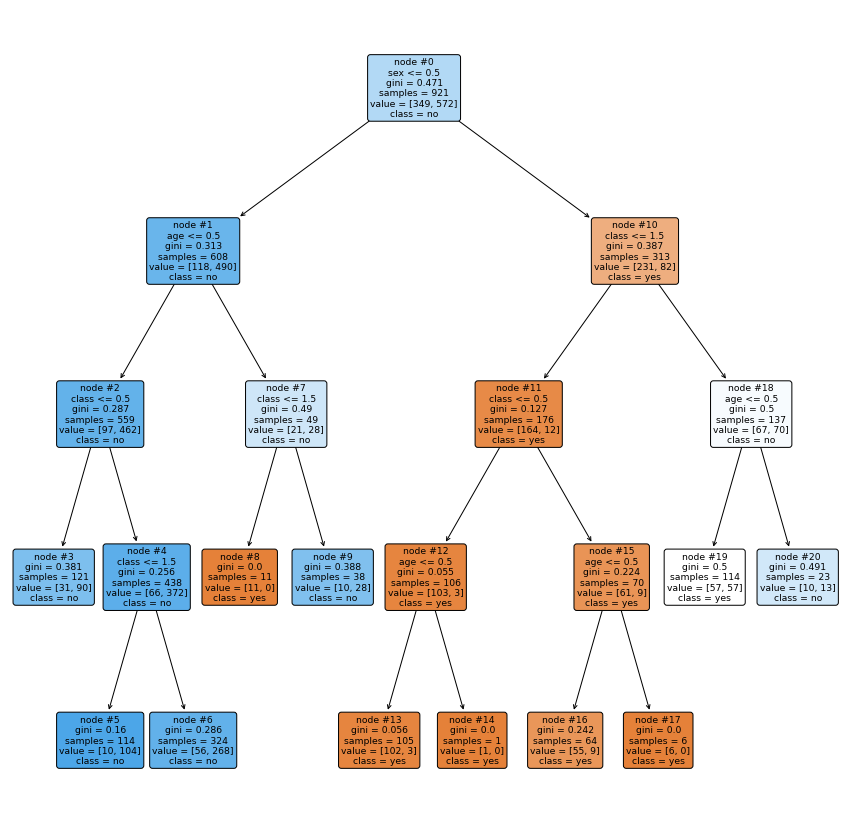

In [29]:
f, ax = plt.subplots(figsize=(15, 15))
retnr=plot_tree(base_clf,feature_names=feature_names,class_names=labels,filled=True,
                rounded=True,node_ids=True)

In [30]:
## imprime o índice de gini de cada nó
def print_gini(retnr):
    for i in retnr:
        anotacao = i.get_prop_tup()[2].split('\n')
        valores = {}
        for j in anotacao:
            tupla = j.split('=')
            if tupla[0].find('node') >= 0:
                valores['node'] = tupla[0]
            if tupla[0].strip() == 'samples':
                valores['samples'] = float(tupla[1].strip())
            if tupla[0].strip() == 'value':
                valores['value'] = list(map(int,tupla[1].strip().strip('[').strip(']').split(',')))
            #print(valores)   
        if 'samples'in valores and 'value' in valores:
            den = 0
            for k in valores['value']:
                den += (k/valores['samples'])**2
                #print(k)
                #print(k/samples)
                gini = 1 - den
            print('%s - gini = %.3f' %(valores['node'],gini))

In [31]:
print_gini(retnr)

node #0 - gini = 0.471
node #1 - gini = 0.313
node #2 - gini = 0.287
node #3 - gini = 0.381
node #4 - gini = 0.256
node #5 - gini = 0.160
node #6 - gini = 0.286
node #7 - gini = 0.490
node #8 - gini = 0.000
node #9 - gini = 0.388
node #10 - gini = 0.387
node #11 - gini = 0.127
node #12 - gini = 0.055
node #13 - gini = 0.056
node #14 - gini = 0.000
node #15 - gini = 0.224
node #16 - gini = 0.242
node #17 - gini = 0.000
node #18 - gini = 0.500
node #19 - gini = 0.500
node #20 - gini = 0.491


### Avaliação em Treinamento

In [32]:
y_pred = base_clf.predict(x_train)
c = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,232,117
no,69,503


              precision    recall  f1-score   support

         yes     0.7708    0.6648    0.7138       349
          no     0.8113    0.8794    0.8440       572

    accuracy                         0.7980       921
   macro avg     0.7910    0.7721    0.7789       921
weighted avg     0.7959    0.7980    0.7947       921

balanced accuracy: 0.7721


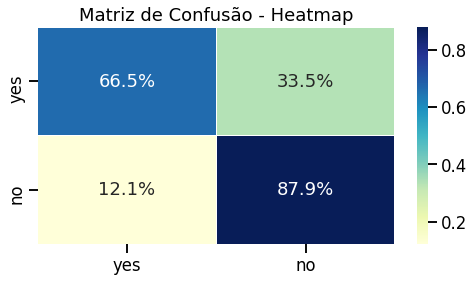

In [33]:
acc_train['base_clf']=heat_map_matriz(y_train, y_pred, labels)

### Avaliação em Validação

In [34]:
y_pred = base_clf.predict(x_val)
c = confusion_matrix(y_val, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,56,34
no,22,125


              precision    recall  f1-score   support

         yes     0.7179    0.6222    0.6667        90
          no     0.7862    0.8503    0.8170       147

    accuracy                         0.7637       237
   macro avg     0.7521    0.7363    0.7418       237
weighted avg     0.7603    0.7637    0.7599       237

balanced accuracy: 0.7363


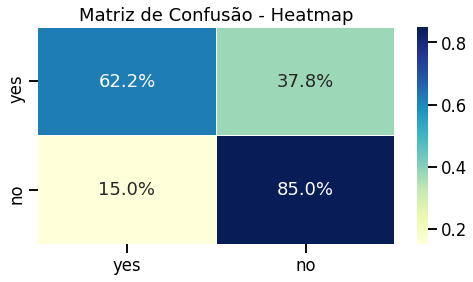

In [35]:
acc_val['base_clf']=heat_map_matriz(y_val, y_pred, labels)

### Análise

In [36]:
print('Acurácia balanceada em treinamento: %5.2f' %(100.0*acc_train['base_clf'])+'%')
print('Acurácia balanceada em validação  : %5.2f' %(100.0*acc_val['base_clf'])+'%')
print('Diferença treinamento e validação : %5.2f' %(100.0*(acc_train['base_clf']-acc_val['base_clf']))+'%')

Acurácia balanceada em treinamento: 77.21%
Acurácia balanceada em validação  : 73.63%
Diferença treinamento e validação :  3.58%


- Acurácia balanceada em treinamento pouco maior que em validação. Overfitting improvável. 
- Classe yes, que está em menor número, com maior erro.

## Modelo Melhorado 1
Árvore de decisão com regularização. Alteração do hiperparâmetro `max_depht`.

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt1_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
dt1_clf.fit(x_train, y_train)
modelos['dt1_clf']=base_clf
print(dt1_clf)

DecisionTreeClassifier(max_depth=2, random_state=42)


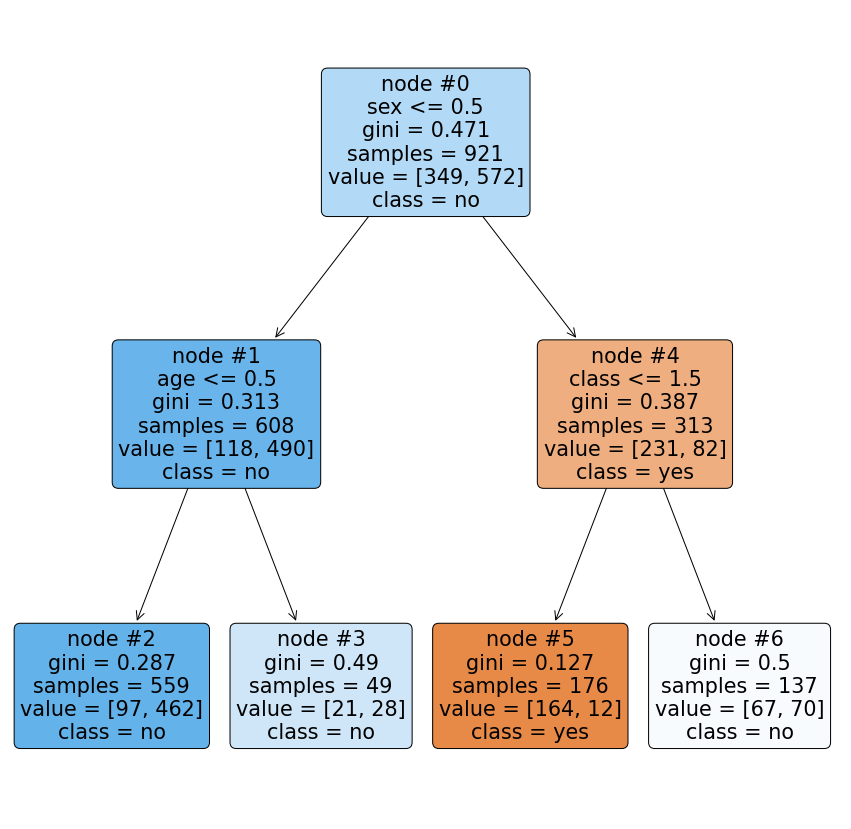

In [38]:
f, ax = plt.subplots(figsize=(15, 15))
retnr=plot_tree(dt1_clf,feature_names=feature_names,class_names=labels,filled=True,
                rounded=True, impurity=True, node_ids=True)

In [39]:
print_gini(retnr)

node #0 - gini = 0.471
node #1 - gini = 0.313
node #2 - gini = 0.287
node #3 - gini = 0.490
node #4 - gini = 0.387
node #5 - gini = 0.127
node #6 - gini = 0.500


### Avaliação em Treinamento

In [40]:
y_pred = dt1_clf.predict(x_train)
c = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,164,185
no,12,560


              precision    recall  f1-score   support

         yes     0.9318    0.4699    0.6248       349
          no     0.7517    0.9790    0.8504       572

    accuracy                         0.7861       921
   macro avg     0.8417    0.7245    0.7376       921
weighted avg     0.8199    0.7861    0.7649       921

balanced accuracy: 0.7245


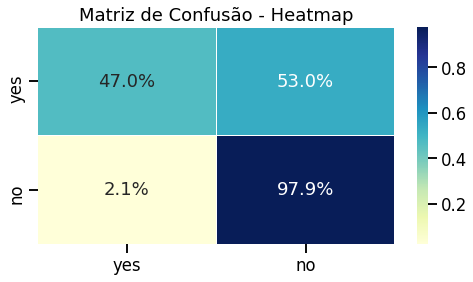

In [41]:
acc_train['dt1_clf']=heat_map_matriz(y_train, y_pred, labels)

### Avaliação em Validação

In [42]:
y_pred = dt1_clf.predict(x_val)
c = confusion_matrix(y_val, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,41,49
no,3,144


              precision    recall  f1-score   support

         yes     0.9318    0.4556    0.6119        90
          no     0.7461    0.9796    0.8471       147

    accuracy                         0.7806       237
   macro avg     0.8390    0.7176    0.7295       237
weighted avg     0.8166    0.7806    0.7578       237

balanced accuracy: 0.7176


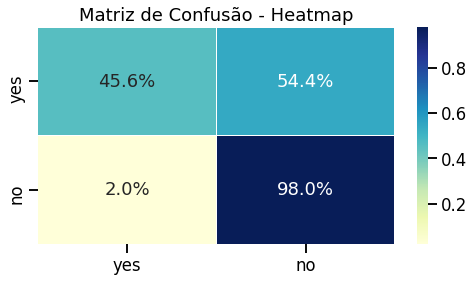

In [43]:
acc_val['dt1_clf']=heat_map_matriz(y_val, y_pred, labels)

### Análise

In [44]:
print('Acurácia balanceada em treinamento: %5.2f' %(100.0*acc_train['dt1_clf'])+'%')
print('Acurácia balanceada em validação  : %5.2f' %(100.0*acc_val['dt1_clf'])+'%')
print('Diferença treinamento e validação : %5.2f' %(100.0*(acc_train['dt1_clf']-acc_val['dt1_clf']))+'%')

Acurácia balanceada em treinamento: 72.45%
Acurácia balanceada em validação  : 71.76%
Diferença treinamento e validação :  0.69%


- Acurácia balanceada em treinamento quase igual a validação. Não há overfitting. 
- Como a acurácia caiu, podemos dizer que agora há underfitting.
- Classe yes, que está em menor número, com maior erro. Classe no com acerto quase total.

## Ensemble Learning

Suponha que você faça uma pergunta complexa a milhares de pessoas aleatórias e depois agregue suas respostas. Em muitos casos, você descobrirá que essa resposta agregada é melhor que a resposta de um especialista. Isso é chamado de sabedoria da multidão. Da mesma forma, se você agregar as previsões de um grupo de preditores (como classificadores ou regressores), geralmente obterá melhores previsões do que com o melhor preditor individual. Um grupo de preditores é chamado de *ensemble* (conjunto); portanto, essa técnica é chamada de Ensemble Learning, e um algoritmo de Ensemble Learning é chamado de Método Ensemble.

Por exemplo, você pode treinar um grupo de classificadores da Árvore de Decisão, cada um em um subconjunto aleatório diferente do conjunto de treinamento. Para fazer previsões, basta obter as previsões de todas as árvores individuais e prever a classe que obtém mais votos. Esse conjunto de árvores de decisão é chamado de Floresta Aleatória (*Random Forest*) e, apesar de sua simplicidade, este é um dos mais poderosos algoritmos de aprendizado de máquina disponíveis atualmente.

## Modelo Melhorado 2 - Random Forests
Usaremos um número bem grande de árvores, sem restrições, para ver se melhoramos os resultados para a classe `yes`.

In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [46]:
rf_clf = RandomForestClassifier(n_estimators=5000, random_state=42)
rf_clf.fit(x_train,y_train)
modelos['rf_clf'] = rf_clf
rf_clf

RandomForestClassifier(n_estimators=5000, random_state=42)

### Avaliação em Treinamento

In [47]:
y_pred = rf_clf.predict(x_train)
c = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,175,174
no,12,560


              precision    recall  f1-score   support

         yes     0.9358    0.5014    0.6530       349
          no     0.7629    0.9790    0.8576       572

    accuracy                         0.7980       921
   macro avg     0.8494    0.7402    0.7553       921
weighted avg     0.8285    0.7980    0.7801       921

balanced accuracy: 0.7402


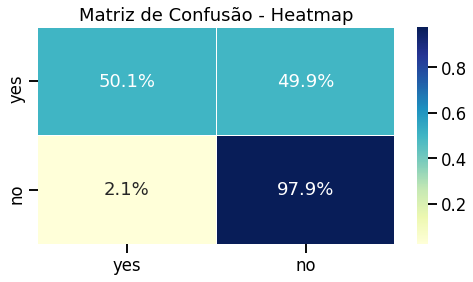

In [48]:
acc_train['rf_clf']=heat_map_matriz(y_train, y_pred, labels)

### Avaliação em Validação

In [49]:
y_pred = rf_clf.predict(x_val)
c = confusion_matrix(y_val, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,46,44
no,3,144


              precision    recall  f1-score   support

         yes     0.9388    0.5111    0.6619        90
          no     0.7660    0.9796    0.8597       147

    accuracy                         0.8017       237
   macro avg     0.8524    0.7454    0.7608       237
weighted avg     0.8316    0.8017    0.7846       237

balanced accuracy: 0.7454


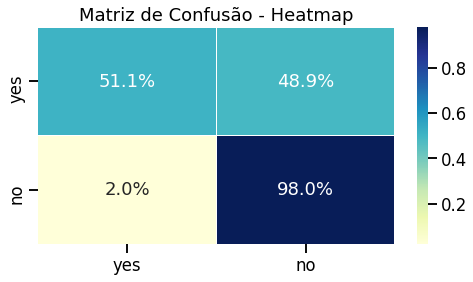

In [50]:
acc_val['rf_clf']=heat_map_matriz(y_val, y_pred, labels)

### Análise

In [51]:
print('Acurácia balanceada em treinamento: %5.2f' %(100.0*acc_train['rf_clf'])+'%')
print('Acurácia balanceada em validação  : %5.2f' %(100.0*acc_val['rf_clf'])+'%')
print('Diferença treinamento e validação : %5.2f' %(100.0*(acc_train['rf_clf']-acc_val['rf_clf']))+'%')

Acurácia balanceada em treinamento: 74.02%
Acurácia balanceada em validação  : 74.54%
Diferença treinamento e validação : -0.51%


- Acurácia balanceada em treinamento quase igual a validação. Não há overfitting. 
- Como a acurácia é baixa, podemos dizer que agora há underfitting.
- Classe yes, que está em menor número, com erro maior ainda. Classe no com acerto quase total.

## Modelo Melhorado 3 - Random Forests com Balanceamento
Ainda usaremos um número bem grande de árvores. Não precisa fazer regularização por enquanto porque não houve overfitting. Aliás, Random Forests é um algoritmo bem resistente à overfitting. Iremos agora usar o hiperparâmetro class_weight, que faz um balanceamento entre as classes usando pesos.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# "balanced_subsample" 
rf_clf2 = RandomForestClassifier(n_estimators=5000, class_weight = 'balanced', random_state=42)
rf_clf2.fit(x_train,y_train)
modelos['rf_clf2'] = rf_clf2
rf_clf2

RandomForestClassifier(class_weight='balanced', n_estimators=5000,
                       random_state=42)

### Avaliação em Treinamento

In [54]:
y_pred = rf_clf2.predict(x_train)
c = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,242,107
no,82,490


              precision    recall  f1-score   support

         yes     0.7469    0.6934    0.7192       349
          no     0.8208    0.8566    0.8383       572

    accuracy                         0.7948       921
   macro avg     0.7838    0.7750    0.7787       921
weighted avg     0.7928    0.7948    0.7932       921

balanced accuracy: 0.7750


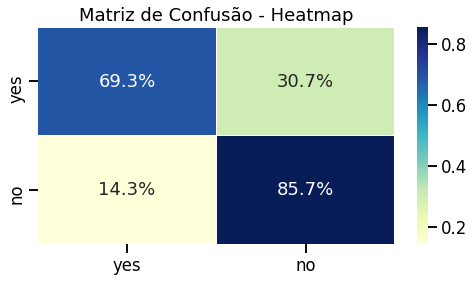

In [55]:
acc_train['rf_clf2']=heat_map_matriz(y_train, y_pred, labels)

### Avaliação em Validação

In [56]:
y_pred = rf_clf2.predict(x_val)
c = confusion_matrix(y_val, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,58,32
no,25,122


              precision    recall  f1-score   support

         yes     0.6988    0.6444    0.6705        90
          no     0.7922    0.8299    0.8106       147

    accuracy                         0.7595       237
   macro avg     0.7455    0.7372    0.7406       237
weighted avg     0.7567    0.7595    0.7574       237

balanced accuracy: 0.7372


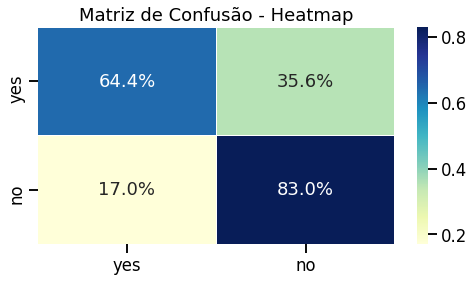

In [57]:
acc_val['rf_clf2']=heat_map_matriz(y_val, y_pred, labels)

### Análise

In [58]:
print('Acurácia balanceada em treinamento: %5.2f' %(100.0*acc_train['rf_clf2'])+'%')
print('Acurácia balanceada em validação  : %5.2f' %(100.0*acc_val['rf_clf2'])+'%')
print('Diferença treinamento e validação : %5.2f' %(100.0*(acc_train['rf_clf2']-acc_val['rf_clf2']))+'%')

Acurácia balanceada em treinamento: 77.50%
Acurácia balanceada em validação  : 73.72%
Diferença treinamento e validação :  3.78%


- Acurácia balanceada em treinamento maior que em validação, mas o overfitting é improvável.
- A acurácia subiu.
- O balanceamento aumentou o número de acertos na classe yes, mas reduziu na classe no. Por isso não houve um reflexo tão grande na acurácia.

## Modelo Melhorado 4 - Random Forests com Dados balanceados artificialmente

Ainda usaremos um número bem grande de árvores. Não precisa fazer regularização por enquanto porque não houve overfitting. Aliás, Random Forests é um algoritmo bem resistente à overfitting. Iremos agora usar o hiperparâmetro class_weight, que faz um balanceamento entre as classes usando pesos.

### Balanceamento Artificial dos Conjuntos de Dados

Uma forma de se balancear conjuntos de dados é o *oversampling*, que significa aumentar o número de amostra criando novas amostras a partir de combinações de dados das amostras existentes.

Um técnica bastante usada é o SMOTE, *Synthetic Minority Oversampling Technique* ou Técnica Sintétiac de Superamostragem da Minoria. O SMOTE cria novas amostras da classe minoritária por meio de interpolação dos dados das classes existentes. Veja mais na documentação do [SMOTE do Scikit-Learn Contrib](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn).

#### Observação: é para balancear apenas o conjunto de dados de treinamento. Nunca aplicar o balanceamento em validação e testes.

In [59]:
# descomentar a linha de baixo se precisar instalar
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

smotenc = SMOTE(random_state=42)
x_smoted, y_smoted = smotenc.fit_resample(x_train, y_train)
#x_smoted, y_smoted = x_train, y_train
print(sorted(Counter(y_smoted).items()))

Using TensorFlow backend.


[(0.0, 572), (1.0, 572)]


In [60]:
rf_clf3 = RandomForestClassifier(n_estimators=5000, random_state=42)
rf_clf3.fit(x_smoted,y_smoted)
modelos['rf_clf3'] = rf_clf3
rf_clf3

RandomForestClassifier(n_estimators=5000, random_state=42)

### Avaliação em Treinamento

In [61]:
y_pred = rf_clf3.predict(x_smoted)
c = confusion_matrix(y_smoted, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,399,173
no,82,490


              precision    recall  f1-score   support

         yes     0.8295    0.6976    0.7578       572
          no     0.7391    0.8566    0.7935       572

    accuracy                         0.7771      1144
   macro avg     0.7843    0.7771    0.7757      1144
weighted avg     0.7843    0.7771    0.7757      1144

balanced accuracy: 0.7771


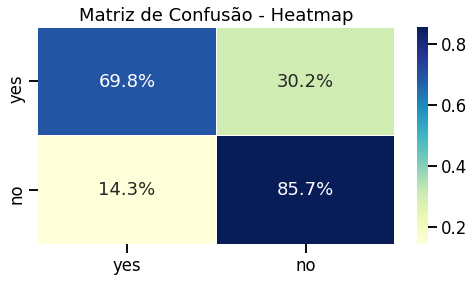

In [62]:
acc_train['rf_clf3']=heat_map_matriz(y_smoted, y_pred, labels)

### Avaliação em Validação

In [63]:
y_pred = rf_clf3.predict(x_val)
c = confusion_matrix(y_val, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,58,32
no,25,122


              precision    recall  f1-score   support

         yes     0.6988    0.6444    0.6705        90
          no     0.7922    0.8299    0.8106       147

    accuracy                         0.7595       237
   macro avg     0.7455    0.7372    0.7406       237
weighted avg     0.7567    0.7595    0.7574       237

balanced accuracy: 0.7372


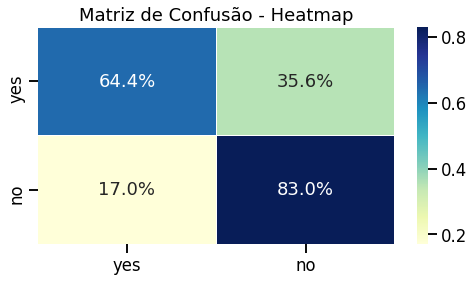

In [64]:
acc_val['rf_clf3']=heat_map_matriz(y_val, y_pred, labels)

### Análise

In [65]:
print('Acurácia balanceada em treinamento: %5.2f' %(100.0*acc_train['rf_clf3'])+'%')
print('Acurácia balanceada em validação  : %5.2f' %(100.0*acc_val['rf_clf3'])+'%')
print('Diferença treinamento e validação : %5.2f' %(100.0*(acc_train['rf_clf3']-acc_val['rf_clf3']))+'%')

Acurácia balanceada em treinamento: 77.71%
Acurácia balanceada em validação  : 73.72%
Diferença treinamento e validação :  3.99%


- Acurácia balanceada em treinamento maior que em validação, mas o overfitting é improvável.
- Os resultados foram os mesmos do balanceamento via peso das classes.

## Teste do melhor modelo

In [66]:
res_df = pd.DataFrame(data=lista_modelos, columns=['modelos'])
res_df['acc_train'] = acc_train.values()
res_df['acc_val'] = acc_val.values()
res_df['acc_train']=res_df['acc_train'].apply(lambda x:round(x,2))
res_df['acc_val']=res_df['acc_val'].apply(lambda x:round(x,2))
res_df

,modelos,acc_train,acc_val
0,Árvore de Decisão,0.77,0.74
1,AD Regularizada,0.72,0.72
2,Floresta Aleatória,0.74,0.75
3,Floresta Balanceada,0.78,0.74
4,Floresta SMOTE,0.78,0.74


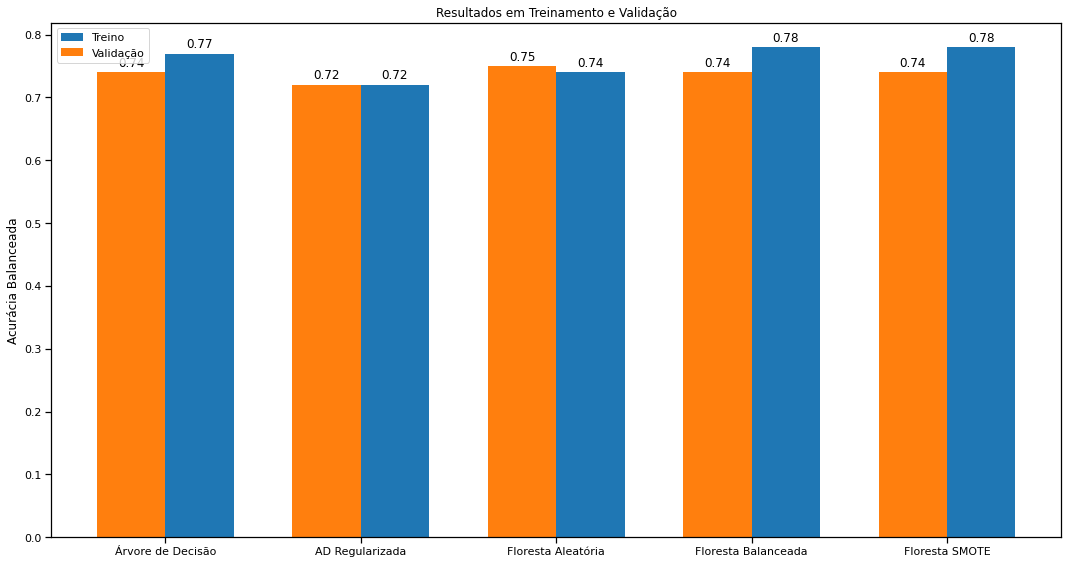

In [67]:
grouped_box(g1=res_df.acc_train, g2=res_df.acc_val, label1='Treino', label2='Validação', \
            grouped_labels = res_df.modelos, ylabel='Acurácia Balanceada', \
            title='Resultados em Treinamento e Validação')

### Escolhendo o que teve melhor acurácia balanceada em validação.

In [68]:
best_model = max(list(map(lambda k: (k[1],k[0]), acc_val.items())))[1]
bm = modelos[best_model]

In [69]:
y_pred = bm.predict(x_test)
c = confusion_matrix(y_test, y_pred)
print('Matriz de confusão - real nas linhas, preditos nas colunas.')
pd.DataFrame(c,index=labels,columns=labels)

Matriz de confusão - real nas linhas, preditos nas colunas.


,yes,no
yes,29,31
no,2,96


              precision    recall  f1-score   support

         yes     0.9355    0.4833    0.6374        60
          no     0.7559    0.9796    0.8533        98

    accuracy                         0.7911       158
   macro avg     0.8457    0.7315    0.7453       158
weighted avg     0.8241    0.7911    0.7713       158

balanced accuracy: 0.7315


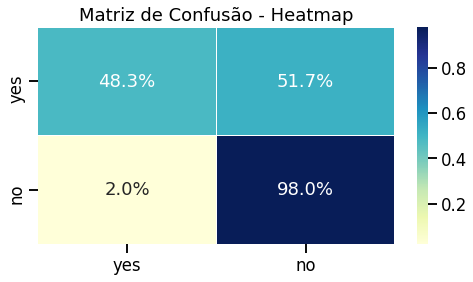

In [70]:
acc_test =heat_map_matriz(y_test, y_pred, labels)

### Conclusão

O conjunto de dados do Titanic é difícil de trabalhar pois possui somente dados categóricos e poucas colunas para tornar o resultado mais preciso. Dado o desbalanceamento, todos os modelos ficaram enviesados para a classe `no`, que significa não sobreviveu. O balanceamento *forçado* dos dados não trouxe resultados satisfatórios.